In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Mechanics Lab 3 -- Projectile Motion with Air Resistance

This lab builds upon the numerical integration code your wrote in the previous lab. This time, though, you will include drag in your calculations of projectile motion.

*** If you have not yet completed Lab 2, please do so now.***

## Objectives
In this lab, you will 

* include linear and quadratic drag in your equations of motion for a projectile,
* validate your code by comparing your numerical solution to the analytic solution in several special cases,and
* calculate the mechanical energy loss due to drag.

## Improved Euler Numerical Integration

#### Exercise 3.1

Start by copying your code from the previous lab to solve projectile motion without air resistance using the improved Euler method into the cell below. Make sure that it still produces reasonable results.

range (for b = 0.05, c = 0.0, m = 0.5 kg) =81.70
mex height (for b = 0.05, c = 0.0, m = 0.5 kg) = 20.39


Text(0, 0.5, 'height (m)')

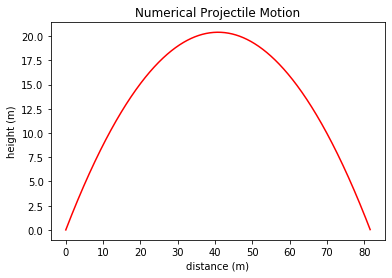

In [36]:
# Exercise 3.1 Projectile motion, improved Euler
# No damping, numerical integration 

# Exercise 2.9 Projectile motion, improved Euler
# No damping, numerical integration 

# Here we define the variables that will be used throughout the integration
g = 9.8 #the acceleration due to gravity.  By declaring it here it will be available anywhere in the rest of the notebook
m = 1 # the mass of the projectile



tstart = 0 #starting time
tend = 15 #ending time
N = 3000 # #steps
h = (tend-tstart)/N #  h is the time step, deltat
tpts = arange(tstart,tend,h)

x0 = 0 #initial x position
y0 = 0 #initial y position
vx0 = 20 #initial x-component of the velocity
vy0 = 20 #initial y-component of the velocity
rinit = array([x0,vx0,y0,vy0],float)

xpts = []  #this is an empty list that will hold x solutions
vxpts = []  #this will hold vx solutions
ypts = []  #y
vypts = [] #vy



r = rinit.copy()  #make a *copy* of rinit.  This leaves rinit unchanged, but allows r to take on different values

def deriv(r,t):
    x = r[0]  #first, extract the variables from the r-list
    vx = r[1]
    y = r[2]
    vy = r[3]
    dxdt = vx #now create the derivatives.  Note:  by definition dxdt = vx
    dvxdt = 0
    dydt = vy
    dvydt = - g
    return array([dxdt, dvxdt, dydt, dvydt],float)

#The engine:  initialize values, then step through with simple Euler method (uses a 1st-order Taylor series)
for t in tpts:  #this *for* loop sequentially takes on all the elements of tpts, first to last
    xpts.append(r[0])  #extend the list by tacking the latest x on to the end of it
    vxpts.append(r[1]) #starting from r which is originally a copy of rinit
    ypts.append(r[2])
    vypts.append(r[3])
    
    
    k1= (h/2)*deriv(r,t) # evaluate the increment on the half step, i.e. the midpoint function at the half step.
    r += h*deriv(r+k1,t) # this is the whole step after sniffing out the derivatives at the midpoint
    
        
    if (t > 0.0)&(r[2]<=0.0):  # a test to see when to cut off the solution
                               # (the & symbol indicates a logical AND:  both conditions need to be true)
        tmax = t               # by noting when the projectile hits the ground
      
        trange = r[0]           #store the last x position in the variable named range
        break  #quit out of the loop

        
        
height = g*(tmax/2)**2/2

        
print(f"range (for b = 0.05, c = 0.0, m = 0.5 kg) ={trange:.2f}")
print(f"mex height (for b = 0.05, c = 0.0, m = 0.5 kg) = {height:.2f}")


figure()  #this just gets us a new figure, otherwise we'll keep plotting atop the previous one

plot(xpts,ypts, color='red')

title( "Numerical Projectile Motion")            
xlabel("distance (m)")
ylabel("height (m)")


## Projectile Motion with Drag

In order to include drag force, you will need to adjust your deriv function to include velocity-dependent damping coefficients of the form:
    
$ \vec{F}_{drag} = -b \vec{v} - c v^2 \hat{v}$

## Linear Drag

#### Exercise 3.2

You will start with the simpler and analytically-solvable case of just linear drag (i.e., c = 0). Redo your Improved Euler projectile problem with the same initial conditions* as before to show the trajectory and find the range (over level ground) for b = 0.05, and c = 0.0.  Assume that the projectile has mass m = 0.5 kg.

##### Drag-restricted range (for b =  0.05, c = 0.0, m = 0.5 kg) = 

\* tStart = 0.0s, tEnd = 15.0s, nSteps = 3000 , $ \vec{r}(0)=(0,0)$m and $\vec{v} (0) = (20,20)$m/s.

*(I get approximately 64 m.  Show your result to 4 significant figures.)*

How is the range and height of the projectile affected by the inclusion of linear drag? Explain ***here***. 


**Without air drag, the range is 81.7 meters and max height is 20.39 meters. With linear air drag, the range is 63.7 meters and the max height is 18.02 meters. So the air drag reduce the range and the max height of the projectile. Air drag convert the kinetic energy into internal energy, so the part of the initial energy is converted to the internal energy instead of converting all of the energy into potential energy. So the range and the max height is reduced.**

Drag-restricted range (for b = 0.05, c = 0.0, m = 0.5 kg) =63.77
Drag-restricted mex height (for b = 0.05, c = 0.0, m = 0.5 kg) = 18.02


Text(0, 0.5, 'height (m)')

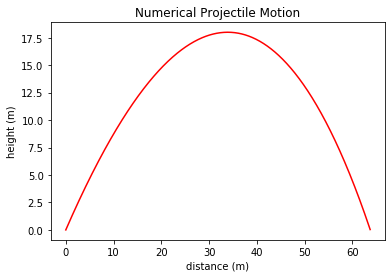

In [56]:
# <Exercise 3.2 Solution for projectile motion with linear drag, using improved Euler.>

g = 9.8 #the acceleration due to gravity.  By declaring it here it will be available anywhere in the rest of the notebook
m = 0.5 # the mass of the projectile



tstart = 0 #starting time
tend = 15 #ending time
N = 3000 # #steps
h = (tend-tstart)/N #  h is the time step, deltat
tpts = arange(tstart,tend,h)

x0 = 0 #initial x position
y0 = 0 #initial y position
vx0 = 20 #initial x-component of the velocity
vy0 = 20 #initial y-component of the velocity
rinit = array([x0,vx0,y0,vy0],float)

xpts = []  #this is an empty list that will hold x solutions
vxpts = []  #this will hold vx solutions
ypts = []  #y
vypts = [] #vy

b = 0.05
c = 0.0


r = rinit.copy()  #make a *copy* of rinit.  This leaves rinit unchanged, but allows r to take on different values

def deriv(r,t):
    x = r[0]  #first, extract the variables from the r-list
    vx = r[1]
    y = r[2]
    vy = r[3]
    dxdt = vx #now create the derivatives.  Note:  by definition dxdt = vx
    dvxdt = -b*vx/m-c*(vx**2+vy**2)**0.5*vx/m 
    dydt = vy
    dvydt = - g - b*vy/m-c*(vx**2+vy**2)**0.5*vy/m 
    return array([dxdt, dvxdt, dydt, dvydt],float)

#The engine:  initialize values, then step through with simple Euler method (uses a 1st-order Taylor series)
for t in tpts:  #this *for* loop sequentially takes on all the elements of tpts, first to last
    xpts.append(r[0])  #extend the list by tacking the latest x on to the end of it
    vxpts.append(r[1]) #starting from r which is originally a copy of rinit
    ypts.append(r[2])
    vypts.append(r[3])
    
    
    k1= (h/2)*deriv(r,t) # evaluate the increment on the half step, i.e. the midpoint function at the half step.
    r += h*deriv(r+k1,t) # this is the whole step after sniffing out the derivatives at the midpoint
    
        
    if (t > 0.0)&(r[2]<=0.0):  # a test to see when to cut off the solution
                               # (the & symbol indicates a logical AND:  both conditions need to be true)
        tmax = t               # by noting when the projectile hits the ground
      
        trange = r[0]           #store the last x position in the variable named range
        break  #quit out of the loop
        
        
height = g*(tmax/2)**2/2

        
print(f"Drag-restricted range (for b = 0.05, c = 0.0, m = 0.5 kg) ={trange:.2f}")
print(f"Drag-restricted mex height (for b = 0.05, c = 0.0, m = 0.5 kg) = {height:.2f}")


figure()  #this just gets us a new figure, otherwise we'll keep plotting atop the previous one

plot(xpts,ypts, color='red')

title( "Numerical Projectile Motion")            
xlabel("distance (m)")
ylabel("height (m)")


## Quadratic Drag

### One-dimensional motion

Next, you will test your quadratic-drag code with two different sets of initial conditions. As you do this, try to determine the minimum amount of code you will need to copy into a new cell. For instance, since your deriv function will not be changing, there is no need to copy it.

#### Exercise 3.3

First you will model a rock dropped vertically from a cliff. Modify your deriv function to include quadratic but not linear drag. Let $b$ = 0 and $c$ = 0.002; keep $m$ = 0.5 kg. Since it is only possible to find an analytic solution with quadratic drag for 1-dimensional motion (why is that?), start by using the following initial conditions: $ \vec{r}(0)=(0, 400)$m and $\vec{v} (0) = (0,0)$m/s. Since the motion will be in one dimension, plot $y$ vs. $t$ rather than vs. $x$.

---
We can only solve the numerical solution for the motion because the differential equation is not solvable by analytical methods. The following is the differential equation for 1d motion with quadratic drag. 

$$
\frac{dv_y}{dt}=-g-\frac{cv_y^2}{m}
$$

Drag-restricted range (for b = 0, c = 0.002, m = 0.5 kg) =0.00
Drag-restricted max height (for b = 0, c = 0.002, m = 0.5 kg) = 162.71


Text(0, 0.5, 'height (m)')

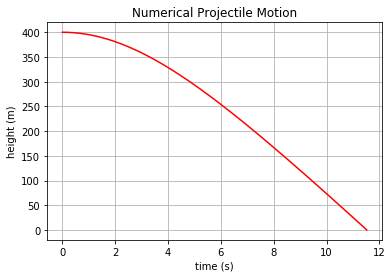

In [71]:
# <Exercise 3.3 Solution for projectile motion with quadratic drag, using improved Euler.>

g = 9.8 #the acceleration due to gravity.  By declaring it here it will be available anywhere in the rest of the notebook
m = 0.5 # the mass of the projectile



tstart = 0 #starting time
tend = 15 #ending time
N = 3000 # #steps
h = (tend-tstart)/N #  h is the time step, deltat
tpts = arange(tstart,tend,h)

x0 = 0 #initial x position
y0 = 400 #initial y position
vx0 =0 #initial x-component of the velocity
vy0 =0 #initial y-component of the velocity
rinit = array([x0,vx0,y0,vy0],float)

xpts = []  #this is an empty list that will hold x solutions
vxpts = []  #this will hold vx solutions
ypts = []  #y
vypts = [] #vy

r = rinit.copy()

b = 0.0
c = 0.002
#The engine:  initialize values, then step through with simple Euler method (uses a 1st-order Taylor series)
for t in tpts:  #this *for* loop sequentially takes on all the elements of tpts, first to last
    xpts.append(r[0])  #extend the list by tacking the latest x on to the end of it
    vxpts.append(r[1]) #starting from r which is originally a copy of rinit
    ypts.append(r[2])
    vypts.append(r[3])
    
    k1= (h/2)*deriv(r,t) # evaluate the increment on the half step, i.e. the midpoint function at the half step.
    r += h*deriv(r+k1,t) # this is the whole step after sniffing out the derivatives at the midpoint
    if (t > 0.0)&(r[2]<=0.0):  # a test to see when to cut off the solution
                               # (the & symbol indicates a logical AND:  both conditions need to be true)
        tmax = t               # by noting when the projectile hits the ground
      
        trange = r[0]           #store the last x position in the variable named range
        break  #quit out of the loop
        
        
height = g*(tmax/2)**2/2

        
print(f"Drag-restricted range (for b = 0, c = 0.002, m = 0.5 kg) ={trange:.2f}")
print(f"Drag-restricted max height (for b = 0, c = 0.002, m = 0.5 kg) = {height:.2f}")


figure()  #this just gets us a new figure, otherwise we'll keep plotting atop the previous one

plot(tpts[:len(ypts)],ypts, color='red')
grid(True)
title( "Numerical Projectile Motion")            
xlabel("time (s)")
ylabel("height (m)")

#### Exercise 3.4

What terminal velocity would you expect the rock to reach?

The terminal velocity using analytical method is -49.5 meters per second. 


##### Expected terminal velocity:

Plot $v_y$ vs. $t$ and estimate the terminal velocity. Are your answers consistent with each other? Explain ***here***. 


The answers are consistent, because terminal velocity predicted by analyzing is -49.50 meters per second and terminal velocity predicted by graphing is -48.48 meters per second. There is an error of 2%. 



terminal velocity predicted by analyzing: -49.50
terminal velocity predicted by graphing: -48.48


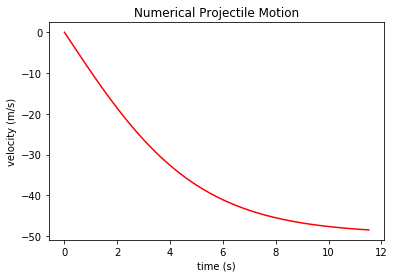

In [72]:
# <Exercise 3.4 v vs. t for projectile motion with quadratic drag, using improved Euler.>

figure()  #this just gets us a new figure, otherwise we'll keep plotting atop the previous one

plot(tpts[:len(vypts)],vypts, color='red')

title( "Numerical Projectile Motion")            
xlabel("time (s)")
ylabel("velocity (m/s)")
vter_ana = -(m*g/c)**0.5

print(f"terminal velocity predicted by analyzing: {vter_ana:.2f}")
print(f"terminal velocity predicted by graphing: {vypts[-1]:.2f}")


#### Exercise 3.5

This is the situation where the rock is thrown vertically up into the air. Calculate and plot $y$ vs. $t$ and $v_y$ vs. $t$ for the initial conditions: $ \vec{r}(0)=(0,0)$m and $\vec{v} (0) = (0,28)$m/s. Find how long the rock remains in the air. Keep all other parameters the same as in exercise 3.3. 

##### Time in air (for b =  0, c = 0.002, m = 0.5 kg) = 

*I get approximately 5 s.  Show your result to 3 significant figures.*

Drag-restricted range (for b = 0, c = 0.002, m = 0.5 kg) =0.00
Drag-restricted max height (for b = 0, c = 0.002, m = 0.5 kg) = 34.67
Time in air (for b = 0, c = 0.002, m = 0.5 kg) =5.3


Text(0, 0.5, 'speed (m/s)')

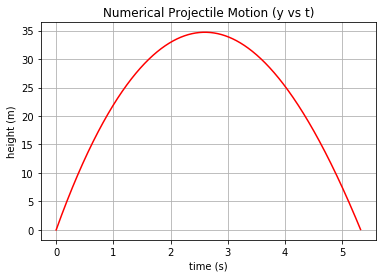

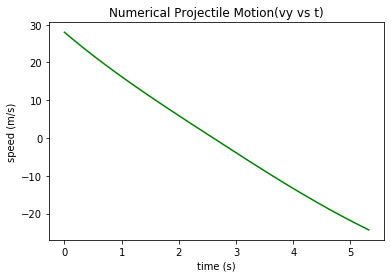

In [74]:
# <Exercise 3.5, projectile motion with quadratic drag, using improved Euler.>


g = 9.8 #the acceleration due to gravity.  By declaring it here it will be available anywhere in the rest of the notebook
m = 0.5 # the mass of the projectile



tstart = 0 #starting time
tend = 15 #ending time
N = 3000 # #steps
h = (tend-tstart)/N #  h is the time step, deltat
tpts = arange(tstart,tend,h)

x0 = 0 #initial x position
y0 = 0 #initial y position
vx0 =0 #initial x-component of the velocity
vy0 =28 #initial y-component of the velocity
rinit = array([x0,vx0,y0,vy0],float)

xpts = []  #this is an empty list that will hold x solutions
vxpts = []  #this will hold vx solutions
ypts = []  #y
vypts = [] #vy

r = rinit.copy()

b = 0.0
c = 0.002
#The engine:  initialize values, then step through with simple Euler method (uses a 1st-order Taylor series)
for t in tpts:  #this *for* loop sequentially takes on all the elements of tpts, first to last
    xpts.append(r[0])  #extend the list by tacking the latest x on to the end of it
    vxpts.append(r[1]) #starting from r which is originally a copy of rinit
    ypts.append(r[2])
    vypts.append(r[3])
    
    k1= (h/2)*deriv(r,t) # evaluate the increment on the half step, i.e. the midpoint function at the half step.
    r += h*deriv(r+k1,t) # this is the whole step after sniffing out the derivatives at the midpoint
    if (t > 0.0)&(r[2]<=0.0):  # a test to see when to cut off the solution
                               # (the & symbol indicates a logical AND:  both conditions need to be true)
        tmax = t               # by noting when the projectile hits the ground
      
        trange = r[0]           #store the last x position in the variable named range
        break  #quit out of the loop
        
        
height = g*(tmax/2)**2/2

        
print(f"Drag-restricted range (for b = 0, c = 0.002, m = 0.5 kg) ={trange:.2f}")
print(f"Drag-restricted max height (for b = 0, c = 0.002, m = 0.5 kg) = {height:.2f}")
print(f"Time in air (for b = 0, c = 0.002, m = 0.5 kg) ={tmax:.1f}")



figure()  #this just gets us a new figure, otherwise we'll keep plotting atop the previous one

plot(tpts[:len(ypts)],ypts, color='red')
grid(True)
title( "Numerical Projectile Motion (y vs t)")            
xlabel("time (s)")
ylabel("height (m)")
figure()
plot(tpts[:len(vypts)],vypts, color='green')

title( "Numerical Projectile Motion(vy vs t)")            
xlabel("time (s)")
ylabel("speed (m/s)")



#### Exercise 3.6

Drag forces are nonconservative forces so work done by them results in a loss of the mechanical energy of the system. To see this, first find the amount of mechanical energy lost during the rock's trajectory and then graph the kinetic energy, potential energy and total energy vs. time (all on one plot).

##### Mechanical energy loss = 

*(I get approximately 48 J.  Show your result to 3 significant figures.)*

Notice that at one point in the trajectory, the rate of energy loss goes to zero. Explain ***here*** why that makes sense.

Mechanical energy loss =-47.8


Text(0, 0.5, 'Energy (J)')

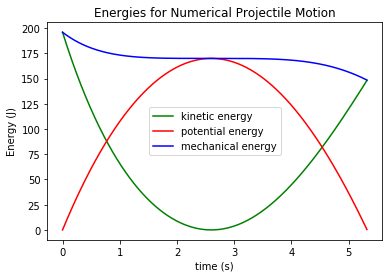

In [99]:
# <Exercise 3.6, mechanical energy loss.>

deltaKE = m/2*(vypts[-1]**2-vypts[0]**2)
print(f"Mechanical energy loss ={deltaKE:.1f}")

kepts = []
for velocity in vypts:
    kepts.append((m/2)*velocity**2)
kepts = array(kepts)
pepts = []
for ycord in ypts:
    pepts.append(m*g*ycord)
pepts = array(pepts)
mepts = []
for ke in range(len(kepts)):
    mepts.append(kepts[ke] + pepts[ke])
mepts = array(mepts)

figure()
plot(tpts[:len(vypts)],kepts, color='green', label = "kinetic energy")
plot(tpts[:len(vypts)],pepts, color='red', label = 'potential energy')
plot(tpts[:len(vypts)],mepts, color='blue', label = 'mechanical energy')
legend()

title( "Energies for Numerical Projectile Motion")            
xlabel("time (s)")
ylabel("Energy (J)")


#### Exercise 3.7

Since work done on a system is equal to the change in energy, it is possible to equate the change in mechanical energy of the rock to the work done by the drag force. For this exercise, estimate the work done by the drag force across each time-step and sum to find the total work done. Essentially, you will be finding

$$
W = \int \vec F \cdot d\vec r
$$

using the rectangle method for estimating an integral. Verify that the total work you calculate is close to the change in energy.

*Hint 1:* The function cumsum() will calculate the sum over an array. This is cleaner and easier than writing a loop to sum over the elements, as you did in the previous lab. https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html

*Hint 2:* You'll need to find the displacement across each time-step. One way to do this is to subtract y[0:-2] from y[1:-1]. Can you see why? Remember that referencing element -1, refers to the last element in the array.

*Hint 3:* Be aware of the negative/positive signs of your displacement.

---
The work done by drag force is -47.25 j. and the loss in mechanical energy is -47.8 j. The two energies are approximately equal. 

In [123]:
# <Exercise 3.7, work done by drag force.>
dispts = array(ypts[1:-1])-array(ypts[0:-2])

dispts = abs(dispts)


vya = array(vypts)
fpts = -c*vya**2



wpts = fpts[1:-1] * dispts
cumw = cumsum(wpts)
print(f'total work done by drag force= {cumw[-1]:.2f}')



total work done by drag force= -47.25


## Linear and Quadratic Drag

Now for 2-dimensional motion with both linear and quadratic drag. *This is a trajectory that cannot be found analytically and so must be calculated numercially!* 

#### Exercise 3.8

Looking at Exercise 2.1 in Taylor (p. 45), match the coefficients for a baseball of diameter $d$ =7 cm, and mass $m$ = 145 g and again plot the trajectory and find the range. In order to see clearly the effect of the drag, include the analytic solution for the case of zero-drag on your plot of the trajectory.

*Coding style tip:* rather than hard-coding your values for the drag-coefficients into your deriv function, try passing them as variables. This will make your deriv function more flexible.

##### Drag-restricted range for the baseball = 

*(I get approximately 55 m.  Show your result to 4 significant figures.)*

range (for b = 0.05, c = 0.0, m = 0.5 kg) =81.70
mex height (for b = 0.05, c = 0.0, m = 0.5 kg) = 20.39
Drag-restricted range for the baseball = 54.61
Drag-restricted mex height (for b = 0.05, c = 0.0, m = 0.5 kg) = 16.05


54.552870639502466

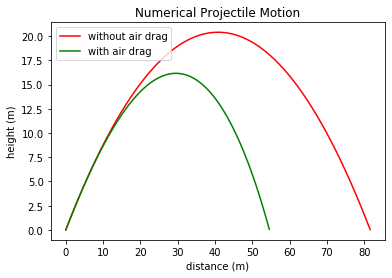

In [141]:
# <Exercise 3.8 Solution for baseball from Taylor, p. 45. Projectile motion, improved Euler, with drag.>
g = 9.8 #the acceleration due to gravity.  By declaring it here it will be available anywhere in the rest of the notebook
m = 1 # the mass of the projectile



tstart = 0 #starting time
tend = 15 #ending time
N = 3000 # #steps
h = (tend-tstart)/N #  h is the time step, deltat
tpts = arange(tstart,tend,h)

x0 = 0 #initial x position
y0 = 0 #initial y position
vx0 = 20 #initial x-component of the velocity
vy0 = 20 #initial y-component of the velocity
rinit = array([x0,vx0,y0,vy0],float)

xpts = []  #this is an empty list that will hold x solutions
vxpts = []  #this will hold vx solutions
ypts = []  #y
vypts = [] #vy



r = rinit.copy()  #make a *copy* of rinit.  This leaves rinit unchanged, but allows r to take on different values

def deriv(r,t):
    x = r[0]  #first, extract the variables from the r-list
    vx = r[1]
    y = r[2]
    vy = r[3]
    dxdt = vx #now create the derivatives.  Note:  by definition dxdt = vx
    dvxdt = 0
    dydt = vy
    dvydt = - g
    return array([dxdt, dvxdt, dydt, dvydt],float)

#The engine:  initialize values, then step through with simple Euler method (uses a 1st-order Taylor series)
for t in tpts:  #this *for* loop sequentially takes on all the elements of tpts, first to last
    xpts.append(r[0])  #extend the list by tacking the latest x on to the end of it
    vxpts.append(r[1]) #starting from r which is originally a copy of rinit
    ypts.append(r[2])
    vypts.append(r[3])
    
    
    k1= (h/2)*deriv(r,t) # evaluate the increment on the half step, i.e. the midpoint function at the half step.
    r += h*deriv(r+k1,t) # this is the whole step after sniffing out the derivatives at the midpoint
    
        
    if (t > 0.0)&(r[2]<=0.0):  # a test to see when to cut off the solution
                               # (the & symbol indicates a logical AND:  both conditions need to be true)
        tmax = t               # by noting when the projectile hits the ground
      
        trange = r[0]           #store the last x position in the variable named range
        break  #quit out of the loop

        
        
height = g*(tmax/2)**2/2

        
print(f"range (for b = 0.05, c = 0.0, m = 0.5 kg) ={trange:.2f}")
print(f"mex height (for b = 0.05, c = 0.0, m = 0.5 kg) = {height:.2f}")


figure()  #this just gets us a new figure, otherwise we'll keep plotting atop the previous one

plot(xpts,ypts, color='red', label = 'without air drag')

title( "Numerical Projectile Motion")            
xlabel("distance (m)")
ylabel("height (m)")
g = 9.8 #the acceleration due to gravity.  By declaring it here it will be available anywhere in the rest of the notebook
m = 0.145 # the mass of the projectile
d = 0.07


tstart = 0 #starting time
tend = 15 #ending time
N = 3000 # #steps
h = (tend-tstart)/N #  h is the time step, deltat
tpts = arange(tstart,tend,h)

x0 = 0 #initial x position
y0 = 0 #initial y position
vx0 = 20 #initial x-component of the velocity
vy0 = 20 #initial y-component of the velocity
rinit = array([x0,vx0,y0,vy0],float)

xpts = []  #this is an empty list that will hold x solutions
vxpts = []  #this will hold vx solutions
ypts = []  #y
vypts = [] #vy

b = 1.6e-4*d
c = 0.25*d**2
b=0
r = rinit.copy()  #make a *copy* of rinit.  This leaves rinit unchanged, but allows r to take on different values

def deriv(r,t):
    x = r[0]  #first, extract the variables from the r-list
    vx = r[1]
    y = r[2]
    vy = r[3]
    dxdt = vx #now create the derivatives.  Note:  by definition dxdt = vx
    dvxdt = -b*vx/m-c*(vx**2+vy**2)**0.5*vx/m 
    dydt = vy
    dvydt = - g - b*vy/m-c*(vx**2+vy**2)**0.5*vy/m 
    return array([dxdt, dvxdt, dydt, dvydt],float)

#The engine:  initialize values, then step through with simple Euler method (uses a 1st-order Taylor series)
for t in tpts:  #this *for* loop sequentially takes on all the elements of tpts, first to last
    xpts.append(r[0])  #extend the list by tacking the latest x on to the end of it
    vxpts.append(r[1]) #starting from r which is originally a copy of rinit
    ypts.append(r[2])
    vypts.append(r[3])
    
    
    k1= (h/2)*deriv(r,t) # evaluate the increment on the half step, i.e. the midpoint function at the half step.
    r += h*deriv(r+k1,t) # this is the whole step after sniffing out the derivatives at the midpoint
    
        
    if (t > 0.0)&(r[2]<=0.0):  # a test to see when to cut off the solution
                               # (the & symbol indicates a logical AND:  both conditions need to be true)
        tmax = t               # by noting when the projectile hits the ground
      
        trange = r[0]           #store the last x position in the variable named range
        break  #quit out of the loop
        
        
height = g*(tmax/2)**2/2

        
print(f"Drag-restricted range for the baseball = {trange:.2f}")
print(f"Drag-restricted mex height (for b = 0.05, c = 0.0, m = 0.5 kg) = {height:.2f}")


 #this just gets us a new figure, otherwise we'll keep plotting atop the previous one

plot(xpts,ypts, color='Green', label='with air drag')
legend()

title( "Numerical Projectile Motion")            
xlabel("distance (m)")
ylabel("height (m)")
xpts[-1]


#### Exercise 3.9

Try alternately setting both $b$ and $c$ to zero. ***Which has a greater effect on the trajectory of the baseball: the linear or quadratic term?***


Quadratic drag has greater influence. We can draw this conclusion by comparing the range.

With linear and quadratic drag, range = 54.54682379371847 m 

with only linear drag, range = 81.58714344162715 m

with only quadratic drag, range = 54.552870639502466 m

We can see that quadratic drag is the dominant force. 

## Check-out
#### Exercise 3.10

Briefly summarize in the cell below the ideas of today's lab.

We first reviewed the euler approximation which is useful for numerical analysis. Then we studied the effect of quadratic and linear drag force on projectiles. We plot the graphs for linear and quadratic drag in 1-d, their mechanical kinetic and potential energies. We also checked that the Work done on a system is equal to change in the mechanical energy.


## Challenge Problems

Repeat the work-energy analysis you did in 3.6 and 3.7 for the baseball. Note that you'll have to calculate the change in position for 2-dimensional motion and that you'll have to include both forms of drag. 